### Building the Music Recommender

In [36]:
import pandas as pd

In [37]:
f1 = pd.read_csv('Data/features_df.csv')
f2 = pd.read_csv('Data/features_df2.csv')
f3 = pd.read_csv('Data/features_df3.csv')
f4 = pd.read_csv('Data/features_df4.csv')
f5 = pd.read_csv('Data/features_df5.csv')
f6 = pd.read_csv('Data/features_df6.csv')
f7 = pd.read_csv('Data/features_df7.csv')
f8 = pd.read_csv('Data/features_df8.csv')
f9 = pd.read_csv('Data/features_df9.csv')
f10 = pd.read_csv('Data/features_df10.csv')
f11 = pd.read_csv('Data/features_df11.csv')

In [38]:
music_df = pd.concat([f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11], axis=0)
music_df

,Unnamed: 0,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,3AhXZa8sUQht0UEdBJgpGc,Like a Rolling Stone,Bob Dylan,72,1965-08-30,0.482,0.721,0,-6.839,1,0.731000,0.000000,0.1890,0.5570,95.263,369600,4
1,1,3oTlkzk1OtrhH8wBAduVEi,Smells Like Teen Spirit,Nirvana,0,1991-09-26,0.485,0.863,1,-9.027,1,0.000012,0.016200,0.1380,0.7670,116.835,300977,4
2,2,3ZFBeIyP41HhnALjxWy1pR,A Day In The Life - Remastered,The Beatles,0,1967-06-01,0.364,0.457,4,-14.162,0,0.290000,0.000106,0.9220,0.1750,163.219,337413,4
3,3,5Qt4Cc66g24QWwGP3YYV9y,Good Vibrations (Mono),The Beach Boys,22,1967-09-18,0.398,0.413,1,-10.934,1,0.082200,0.000025,0.0891,0.3310,133.574,219147,4
4,4,7MH2ZclofPlTrZOkPzZKhK,Johnny B Goode,Chuck Berry,0,1959,0.518,0.756,10,-10.851,1,0.735000,0.000062,0.3170,0.9680,166.429,160893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,271,2cX2coZS1PYBfPs8wgbdWE,"More Than A Woman - From ""Saturday Night Fever...",Bee Gees,79,2020-12-11,0.601,0.703,7,-6.240,1,0.175000,0.000084,0.5710,0.6730,106.164,196213,4
272,272,0GRBFjza23Im7Xb16c9AaK,No Quarter - Remaster,Led Zeppelin,58,1973-03-28,0.330,0.342,11,-14.090,1,0.734000,0.671000,0.1290,0.0795,142.950,422518,4
273,273,2xKDKtJBLDPd7BF3VmSQQO,Invincible,TOOL,60,2019-08-30,0.459,0.567,9,-9.133,0,0.009890,0.786000,0.1090,0.3890,87.477,764457,1
274,274,6n6pNDA5p8SLTirQbjAf2A,All Your Love,Gary Moore,35,1990-01-01,0.434,0.579,9,-10.217,0,0.169000,0.005370,0.1660,0.7410,128.949,221200,4


In [39]:
def drop_columns(music_df) :                 
    music_df.drop(columns=['popularity'], inplace=True)
    music_df.drop(columns=['release_date'], inplace=True)
    music_df.drop(columns=['Unnamed: 0'], inplace=True)
    return music_df

In [40]:
music_df = drop_columns(music_df)

In [41]:
len(music_df) #21391

21391

In [42]:
music_df=music_df.drop_duplicates()

In [43]:
len(music_df)

20290

In [44]:
music_df=music_df.reset_index(drop=True)

In [45]:
music_df

,id,title,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,3AhXZa8sUQht0UEdBJgpGc,Like a Rolling Stone,Bob Dylan,0.482,0.721,0,-6.839,1,0.731000,0.000000,0.1890,0.5570,95.263,369600,4
1,3oTlkzk1OtrhH8wBAduVEi,Smells Like Teen Spirit,Nirvana,0.485,0.863,1,-9.027,1,0.000012,0.016200,0.1380,0.7670,116.835,300977,4
2,3ZFBeIyP41HhnALjxWy1pR,A Day In The Life - Remastered,The Beatles,0.364,0.457,4,-14.162,0,0.290000,0.000106,0.9220,0.1750,163.219,337413,4
3,5Qt4Cc66g24QWwGP3YYV9y,Good Vibrations (Mono),The Beach Boys,0.398,0.413,1,-10.934,1,0.082200,0.000025,0.0891,0.3310,133.574,219147,4
4,7MH2ZclofPlTrZOkPzZKhK,Johnny B Goode,Chuck Berry,0.518,0.756,10,-10.851,1,0.735000,0.000062,0.3170,0.9680,166.429,160893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20285,2cX2coZS1PYBfPs8wgbdWE,"More Than A Woman - From ""Saturday Night Fever...",Bee Gees,0.601,0.703,7,-6.240,1,0.175000,0.000084,0.5710,0.6730,106.164,196213,4
20286,0GRBFjza23Im7Xb16c9AaK,No Quarter - Remaster,Led Zeppelin,0.330,0.342,11,-14.090,1,0.734000,0.671000,0.1290,0.0795,142.950,422518,4
20287,2xKDKtJBLDPd7BF3VmSQQO,Invincible,TOOL,0.459,0.567,9,-9.133,0,0.009890,0.786000,0.1090,0.3890,87.477,764457,1
20288,6n6pNDA5p8SLTirQbjAf2A,All Your Love,Gary Moore,0.434,0.579,9,-10.217,0,0.169000,0.005370,0.1660,0.7410,128.949,221200,4


In [46]:
music_df.to_csv('Data/music_df.csv')

### K-Means is a distance based algorithm 

In [47]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [48]:
music_df.describe()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.000000,20290.00000,20290.000000,2.029000e+04,20290.000000
mean,0.580199,0.665166,5.301922,-7.943450,0.664465,0.239412,0.101961,0.193237,0.54476,122.530998,2.397111e+05,3.945096
std,0.163307,0.223274,3.571181,3.810708,0.472189,0.296674,0.236600,0.158661,0.24587,27.606516,9.237004e+04,0.309767
min,0.069200,0.000020,0.000000,-60.000000,0.000000,0.000000,0.000000,0.008290,0.02620,37.114000,4.722700e+04,1.000000
25%,0.470000,0.519000,2.000000,-10.057750,0.000000,0.011100,0.000000,0.092525,0.35100,101.991250,1.901555e+05,4.000000
50%,0.585000,0.706000,5.000000,-7.172500,1.000000,0.088950,0.000173,0.129000,0.54900,121.984500,2.243265e+05,4.000000
75%,0.698000,0.848000,9.000000,-5.152000,1.000000,0.396000,0.023475,0.253000,0.74800,138.160250,2.676832e+05,4.000000
max,0.988000,0.999000,11.000000,1.342000,1.000000,0.996000,0.993000,0.993000,0.99000,217.591000,2.516987e+06,5.000000


In [49]:
music_df.dtypes

id                   object
title                object
all_artists          object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

In [50]:
music_df_s = music_df.drop(columns=['danceability',
                                    'energy',
                                    'key',
                                    'loudness',
                                    'mode',
                                    'acousticness',
                                    'instrumentalness', 
                                    'liveness',
                                    'valence', 
                                    'tempo', 
                                    'duration_ms',
                                    'time_signature'])
music_df_s

,id,title,all_artists
0,3AhXZa8sUQht0UEdBJgpGc,Like a Rolling Stone,Bob Dylan
1,3oTlkzk1OtrhH8wBAduVEi,Smells Like Teen Spirit,Nirvana
2,3ZFBeIyP41HhnALjxWy1pR,A Day In The Life - Remastered,The Beatles
3,5Qt4Cc66g24QWwGP3YYV9y,Good Vibrations (Mono),The Beach Boys
4,7MH2ZclofPlTrZOkPzZKhK,Johnny B Goode,Chuck Berry
...,...,...,...
20285,2cX2coZS1PYBfPs8wgbdWE,"More Than A Woman - From ""Saturday Night Fever...",Bee Gees
20286,0GRBFjza23Im7Xb16c9AaK,No Quarter - Remaster,Led Zeppelin
20287,2xKDKtJBLDPd7BF3VmSQQO,Invincible,TOOL
20288,6n6pNDA5p8SLTirQbjAf2A,All Your Love,Gary Moore


In [51]:
X=music_df.drop(columns=['id',
                         'title',
                         'all_artists'])
X

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.482,0.721,0,-6.839,1,0.731000,0.000000,0.1890,0.5570,95.263,369600,4
1,0.485,0.863,1,-9.027,1,0.000012,0.016200,0.1380,0.7670,116.835,300977,4
2,0.364,0.457,4,-14.162,0,0.290000,0.000106,0.9220,0.1750,163.219,337413,4
3,0.398,0.413,1,-10.934,1,0.082200,0.000025,0.0891,0.3310,133.574,219147,4
4,0.518,0.756,10,-10.851,1,0.735000,0.000062,0.3170,0.9680,166.429,160893,4
...,...,...,...,...,...,...,...,...,...,...,...,...
20285,0.601,0.703,7,-6.240,1,0.175000,0.000084,0.5710,0.6730,106.164,196213,4
20286,0.330,0.342,11,-14.090,1,0.734000,0.671000,0.1290,0.0795,142.950,422518,4
20287,0.459,0.567,9,-9.133,0,0.009890,0.786000,0.1090,0.3890,87.477,764457,1
20288,0.434,0.579,9,-10.217,0,0.169000,0.005370,0.1660,0.7410,128.949,221200,4


In [52]:
scaler = StandardScaler()
scaler=scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.482,0.721,0,-6.839,1,0.731000,0.000000,0.1890,0.557,95.263,369600,4
1,0.485,0.863,1,-9.027,1,0.000012,0.016200,0.1380,0.767,116.835,300977,4
2,0.364,0.457,4,-14.162,0,0.290000,0.000106,0.9220,0.175,163.219,337413,4
3,0.398,0.413,1,-10.934,1,0.082200,0.000025,0.0891,0.331,133.574,219147,4
4,0.518,0.756,10,-10.851,1,0.735000,0.000062,0.3170,0.968,166.429,160893,4


,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.601334,0.250077,-1.484678,0.289835,0.710612,1.657036,-0.430952,-0.026704,0.049784,-0.987762,1.406215,0.177247
1,-0.582963,0.886083,-1.204651,-0.284351,0.710612,-0.806964,-0.362480,-0.348151,0.903916,-0.206333,0.663282,0.177247
2,-1.323919,-0.932358,-0.364572,-1.631902,-1.407237,0.170521,-0.430504,4.593314,-1.503924,1.473891,1.057749,0.177247
3,-1.115716,-1.129431,-1.204651,-0.784795,0.710612,-0.529927,-0.430844,-0.656363,-0.869426,0.400024,-0.222633,0.177247
4,-0.380884,0.406839,1.315585,-0.763014,0.710612,1.670519,-0.430690,0.780066,1.721443,1.590171,-0.853307,0.177247


In [53]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2.029000e+04,2.029000e+04,2.029000e+04,2.029000e+04,2.029000e+04,2.029000e+04,2.029000e+04,2.029000e+04,2.029000e+04,2.029000e+04,2.029000e+04,2.029000e+04
mean,-9.745613e-16,-6.907677e-16,-1.621150e-16,-8.645787e-16,-4.431388e-15,-5.604957e-16,2.841547e-15,1.146610e-16,-3.688359e-16,-2.189667e-16,8.236662e-17,4.771185e-15
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-3.129157e+00,-2.979134e+00,-1.484678e+00,-1.366094e+01,-1.407237e+00,-8.070050e-01,-4.309518e-01,-1.165699e+00,-2.109138e+00,-3.094165e+00,-2.083888e+00,-9.507705e+00
25%,-6.748171e-01,-6.546652e-01,-9.246250e-01,-5.548450e-01,-1.407237e+00,-7.695893e-01,-4.309518e-01,-6.347752e-01,-7.880800e-01,-7.440365e-01,-5.365031e-01,1.772472e-01
50%,2.939722e-02,1.828928e-01,-8.454613e-02,2.023164e-01,7.106121e-01,-5.071741e-01,-4.302206e-01,-4.048774e-01,1.724512e-02,-1.979647e-02,-1.665580e-01,1.772472e-01
75%,7.213643e-01,8.188995e-01,1.035559e+00,7.325460e-01,7.106121e-01,5.278241e-01,-3.317312e-01,3.766809e-01,8.266375e-01,5.661575e-01,3.028346e-01,1.772472e-01
max,2.497209e+00,1.495216e+00,1.595612e+00,2.436733e+00,7.106121e-01,2.550292e+00,3.766110e+00,5.040819e+00,1.810924e+00,3.443475e+00,2.465444e+01,3.405565e+00


### Clustering the wines with K-Means

In [54]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans= kmeans.fit(X_scaled_df)

In [55]:
len(kmeans.labels_)

20290

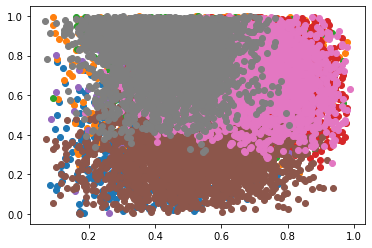

In [56]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 0], X.to_numpy()[row_ix, 1])
    # show the plot
pyplot.show()

In [57]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     950
1    1647
2    1230
3    5363
4     222
5    3033
6    4238
7    3607
dtype: int64

In [58]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X.head()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.482,0.721,0,-6.839,1,0.731000,0.000000,0.1890,0.557,95.263,369600,4,3
1,0.485,0.863,1,-9.027,1,0.000012,0.016200,0.1380,0.767,116.835,300977,4,3
2,0.364,0.457,4,-14.162,0,0.290000,0.000106,0.9220,0.175,163.219,337413,4,2
3,0.398,0.413,1,-10.934,1,0.082200,0.000025,0.0891,0.331,133.574,219147,4,7
4,0.518,0.756,10,-10.851,1,0.735000,0.000062,0.3170,0.968,166.429,160893,4,3


In [59]:
X[X['cluster'] == 2].sample()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
7250,0.637,0.793,5,-4.538,0,0.00575,0.0,0.597,0.81,122.251,213773,4,2


In [60]:
kmeans.inertia_

142241.50904030193

### Chosing K

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

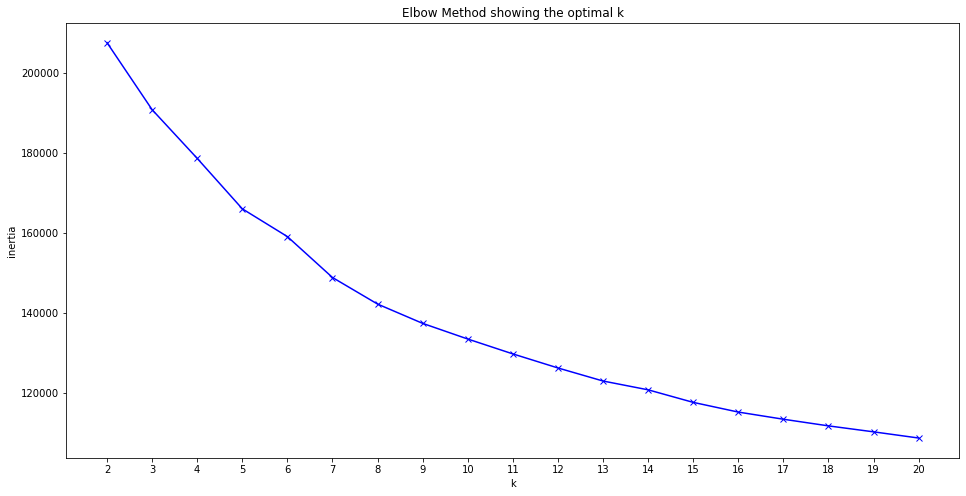

In [61]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#### k=8

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

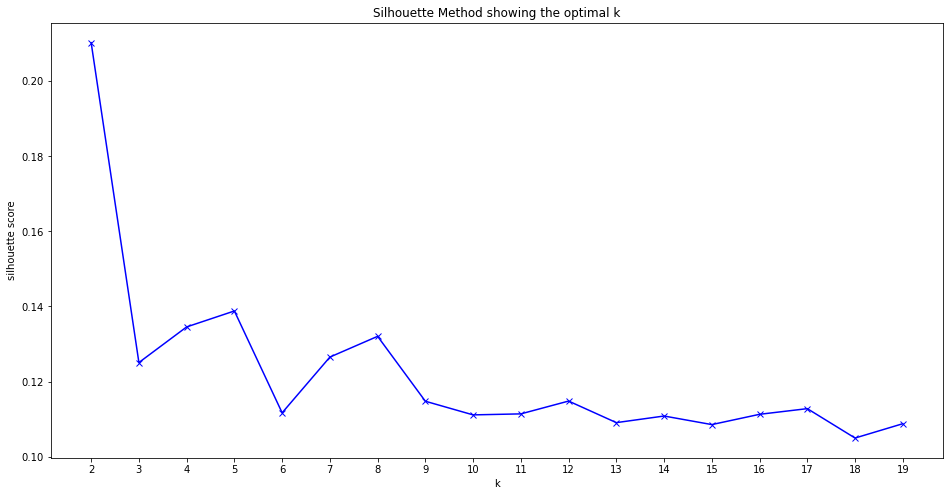

In [62]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
   
        
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [63]:
import pickle

In [64]:
with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

In [65]:
with open("scaler.pickle", "rb") as f:
    scaler=pickle.load(f)

scaler.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [66]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans = kmeans.fit(X_scaled_df)
kmeans.n_clusters

8

In [67]:
with open("kmeans.pickle", "wb") as f:
    pickle.dump(kmeans, f)

In [68]:
with open("kmeans.pickle", "rb") as f:
    model=pickle.load(f)

In [69]:
model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [70]:
music_df2=pd.concat([music_df_s, X], axis=1)
music_df2.to_csv('Data/clustered_music_features.csv')